# 2nova EDA, RFM and FMR Analysis
## Goods
Посмотрим на данные, содержащие информацию о товарах.

In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

goods = pd.read_csv('goods.csv', sep=';')
goods.rename(columns={'id': 'good_id'}, inplace=True)

print('Size of the data set: {} rows and {} columns'.format(*goods.shape))
goods.head()

Size of the data set: 34316 rows and 5 columns


,good_id,name,price,oldPrice,visible
0,617,Носки детские,69.0,69.0,0.0
1,618,Рейтузы детские для девочек,349.0,449.0,0.0
2,686,Трусы детские для девочек 3шт,249.0,249.0,0.0
3,687,Трусы детские для девочек 3шт,249.0,249.0,0.0
4,688,Трусы детские для девочек 2шт,199.0,299.0,0.0


Посчитаем количество отсутствующих значений в данных.

In [60]:
for col in goods.columns:
    print('{} missing values in {} column'.format(goods[col].isnull().sum().sum(), col))

0 missing values in good_id column
1 missing values in name column
1 missing values in price column
1 missing values in oldPrice column
1 missing values in visible column


Удалим строки, содержащие отсутствующие значения.

In [61]:
goods.dropna(inplace=True)

print('Size of the data set: {} rows and {} columns'.format(*goods.shape))

Size of the data set: 34315 rows and 5 columns


Построим граф распределения цен товаров. 

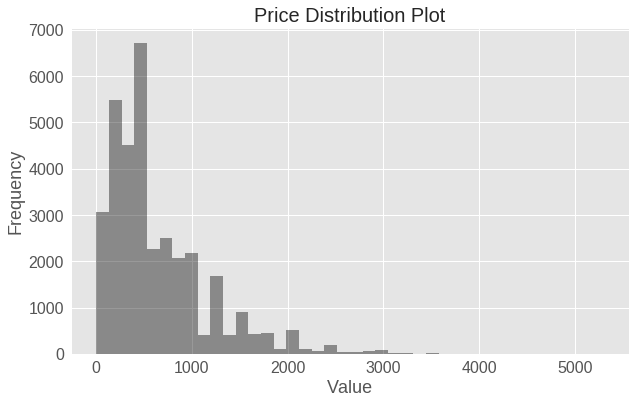

min: 0.0, max: 5299.0, mean: 632.85, std: 529.31


In [62]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

sns.distplot(goods.price, bins=40, kde=False, color='black')

plt.xlabel('Value', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Price Distribution Plot', fontsize=20)
plt.show()

print('min: {}, max: {}, mean: {:.2f}, std: {:.2f}'.format(
    min(goods.price), max(goods.price), goods.price.mean(), goods.price.std()))

Посчитаем количество уникальных товаров.

In [63]:
goods.name.unique().shape

(5319,)

## Order goods
Посмотрим на данные, содержащие информацию о заказах этих товаров.

In [64]:
order_goods = pd.read_csv('order-goods.csv', sep=';', 
                          encoding='ISO-8859-1', dtype={'price': 'object'})

order_goods.price = order_goods.price.apply(lambda x: float((str(x).replace(' ', ''))))
order_goods.rename(columns={'orderId': 'order_id'}, inplace=True)

print('Size of the data set: {} rows and {} columns'.format(*order_goods.shape))
order_goods.head()

Size of the data set: 897933 rows and 7 columns


,order_id,goodId,size,qty,price,originalPrice,originalOldPrice
0,451752.0,37101.0,70B,2.0,1.0,499.0,1099.0
1,451752.0,37129.0,S,2.0,499.0,499.0,0.0
2,451752.0,42809.0,one size,1.0,1.0,399.0,0.0
3,451752.0,37101.0,75C,1.0,499.0,499.0,1099.0
4,451752.0,42784.0,S,1.0,1.0,499.0,0.0


Посчитаем количество отсутствующих значений в данных.

In [65]:
for col in order_goods.columns:
    print('{} missing values in {} column'.format(order_goods[col].isnull().sum().sum(), col))

3889 missing values in order_id column
1 missing values in goodId column
1 missing values in size column
1 missing values in qty column
1 missing values in price column
1 missing values in originalPrice column
1 missing values in originalOldPrice column


Удалим строки, содержащие отсутствующие значения.

In [66]:
# order_goods[pd.isnull(order_goods.orderId) == True].head()
order_goods.dropna(inplace=True)

print('Size of the data set: {} rows and {} columns'.format(*order_goods.shape))

Size of the data set: 894044 rows and 7 columns


Построим граф распределения цен, за которые товар в итоге был приобретен. 

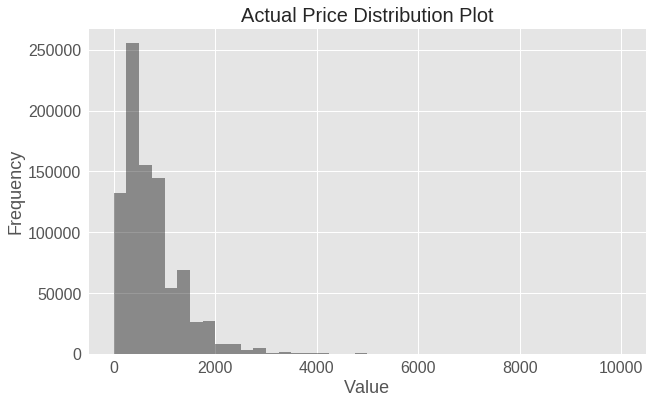

min: 0.0, max: 9999.0, mean: 769.09, std: 597.23


In [67]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

sns.distplot(order_goods.price, bins=40, kde=False, color='black')

plt.xlabel('Value', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Actual Price Distribution Plot', fontsize=20)
plt.show()

print('min: {}, max: {}, mean: {:.2f}, std: {:.2f}'.format(
    min(order_goods.price), max(order_goods.price), order_goods.price.mean(), order_goods.price.std()))

Посмотрим на структуру заказов.

In [68]:
order_goods.groupby(order_goods.columns.tolist(), as_index=False).size().head(10)

order_id  goodId   size  qty  price   originalPrice  originalOldPrice
173042.0  19546.0  146   1.0  599.0   299.0          599.0               1
          19549.0  140   1.0  599.0   299.0          599.0               1
          23192.0  140   1.0  599.0   599.0          0.0                 1
          23206.0  140   1.0  1499.0  599.0          1499.0              1
          23223.0  146   1.0  699.0   499.0          699.0               1
173043.0  21131.0  XS    2.0  1499.0  1499.0         1999.0              1
          21733.0  L     1.0  199.0   199.0          299.0               1
173044.0  21132.0  M     1.0  1499.0  1499.0         1999.0              1
173045.0  21133.0  S     1.0  399.0   299.0          599.0               1
          21681.0  S     1.0  999.0   499.0          999.0               1
dtype: int64

## Orders
Посмотрим на данные, содержащие информацию о заказах.

In [69]:
orders = pd.read_csv('orders.csv', sep=';', dtype={'erp_status': 'object'})

orders.accept_time = pd.to_datetime(orders.accept_time)
orders.rename(columns={'id': 'order_id'}, inplace=True)

print('Size of the data set: {} rows and {} columns'.format(*orders.shape))
orders.head()

Size of the data set: 174063 rows and 9 columns


,order_id,from_site,status,payment_type,payed,accept_time,total_cost,user_id,erp_status
0,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-
1,451751.0,inflin,6.0,cash,0.0,2017-05-31 23:44:14,2200.0,82507.0,-
2,451750.0,concept,6.0,cash,0.0,2017-05-31 23:39:14,6000.0,316491.0,-
3,451749.0,acoola,6.0,cash,0.0,2017-05-31 23:37:19,2101.0,336144.0,-
4,451746.0,concept,6.0,cash,0.0,2017-05-31 23:27:22,6300.0,332755.0,-


Посчитаем количество отсутствующих значений в данных и удалим строки, содержащие эти значения.

In [70]:
for col in orders.columns:
    print('{} missing values in {} column'.format(orders[col].isnull().sum().sum(), col))

1371 missing values in order_id column
1 missing values in from_site column
1 missing values in status column
74 missing values in payment_type column
1 missing values in payed column
1 missing values in accept_time column
1 missing values in total_cost column
1 missing values in user_id column
1 missing values in erp_status column


In [71]:
orders.dropna(inplace=True)
print('Size of the data set: {} rows and {} columns'.format(*orders.shape))

Size of the data set: 172619 rows and 9 columns


Посмотрим на статусы заказов, где заказ:
* 3 - оплачен, формируется к отправке
* 5 - отменен
* 6 - отправлен 
* 7 - продажа оформлена

In [72]:
orders.status.value_counts()

6.0    148032
5.0     24540
3.0        43
7.0         4
Name: status, dtype: int64

Посмотрим на распределение заказов с различных сайтов.

In [73]:
orders.from_site.value_counts()

acoola     80816
concept    80111
inflin     11615
maloo         77
Name: from_site, dtype: int64

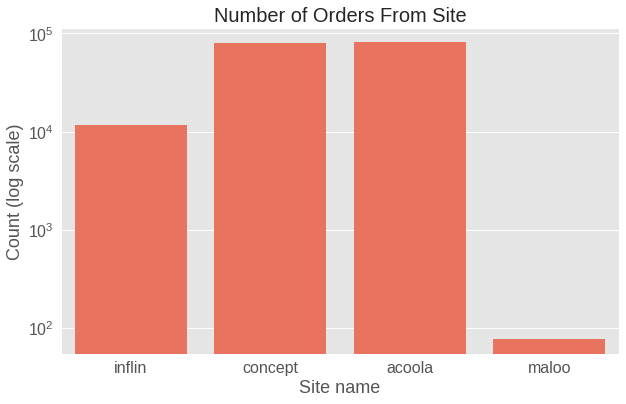

In [74]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

sns.countplot(orders.from_site, color='tomato').set(yscale='log')

plt.xlabel('Site name', fontsize=18)
plt.ylabel('Count (log scale)', fontsize=18)
plt.title('Number of Orders From Site', fontsize=20)
plt.show()

## RFM analysis
Сформируем сводную таблицу данных (только значения заказов со статусом 6) для каждого сайта.

In [75]:
rfm_data = pd.merge(orders[orders.status == 6], order_goods, how='inner', on='order_id')

print('Size of the data set: {} rows and {} columns'.format(*rfm_data.shape))
rfm_data.head()

Size of the data set: 585924 rows and 15 columns


,order_id,from_site,status,payment_type,payed,accept_time,total_cost,user_id,erp_status,goodId,size,qty,price,originalPrice,originalOldPrice
0,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37101.0,70B,2.0,1.0,499.0,1099.0
1,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37129.0,S,2.0,499.0,499.0,0.0
2,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,42809.0,one size,1.0,1.0,399.0,0.0
3,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37101.0,75C,1.0,499.0,499.0,1099.0
4,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,42784.0,S,1.0,1.0,499.0,0.0


## RFM table

In [76]:
import datetime as dt

now = rfm_data.accept_time.max()

In [77]:
rfm_table = rfm_data.groupby(['user_id', 'from_site']).agg({'accept_time': lambda x: (now - x.max()).days, 
                                         'order_id': lambda x: len(x),
                                         'price': lambda x: x.sum()}).reset_index('from_site')

rfm_table.rename(columns={'accept_time': 'recency', 
                          'order_id': 'frequency', 
                          'price': 'monetary_value'}, inplace=True)

cols = ['from_site', 'recency', 'frequency', 'monetary_value']
rfm_table = rfm_table[cols]

rfm_table.head()

,from_site,recency,frequency,monetary_value
user_id,,,,
48.0,acoola,218,3.0,1317.0
48.0,concept,77,14.0,19926.0
48.0,inflin,418,2.0,298.0
70.0,acoola,308,7.0,6308.0
102.0,acoola,447,6.0,8804.0


In [78]:
rfm_data.price[rfm_data.user_id == 70.0].sum()

6308.0

In [79]:
rfm_data.order_id[rfm_data.user_id == 70.0].count()

7

In [80]:
(now - dt.datetime(2016, 7, 27)).days

308

In [81]:
rfm_table[rfm_table.from_site == 'acoola'].drop(['from_site'], axis=1).shape

(30330, 3)

In [82]:
rfm_table_acoola = rfm_table[rfm_table.from_site == 'acoola'].drop(['from_site'], axis=1)
rfm_table_concept = rfm_table[rfm_table.from_site == 'concept'].drop(['from_site'], axis=1)
rfm_table_inflin = rfm_table[rfm_table.from_site == 'inflin'].drop(['from_site'], axis=1)
rfm_table_maloo = rfm_table[rfm_table.from_site == 'maloo'].drop(['from_site'], axis=1)

## RFM Quartiles

In [83]:
quantiles_acoola = rfm_table_acoola.quantile(q=[0.25,0.5,0.75])
quantiles_acoola

,recency,frequency,monetary_value
0.25,83.0,3.0,2096.00
0.50,228.0,5.0,3598.00
0.75,441.0,11.0,7452.75


In [84]:
quantiles_acoola = quantiles_acoola.to_dict()
quantiles_acoola

{'frequency': {0.25: 3.0, 0.5: 5.0, 0.75: 11.0},
 'monetary_value': {0.25: 2096.0, 0.5: 3598.0, 0.75: 7452.75},
 'recency': {0.25: 83.0, 0.5: 228.0, 0.75: 441.0}}

In [85]:
quantiles_concept = rfm_table_concept.quantile(q=[0.25,0.5,0.75])
quantiles_concept

,recency,frequency,monetary_value
0.25,106.0,2.0,1999.0
0.50,244.0,4.0,3597.0
0.75,499.0,9.0,7570.5


In [86]:
quantiles_concept = quantiles_concept.to_dict()
quantiles_concept

{'frequency': {0.25: 2.0, 0.5: 4.0, 0.75: 9.0},
 'monetary_value': {0.25: 1999.0, 0.5: 3597.0, 0.75: 7570.5},
 'recency': {0.25: 106.0, 0.5: 244.0, 0.75: 499.0}}

In [87]:
quantiles_inflin = rfm_table_inflin.quantile(q=[0.25,0.5,0.75])
quantiles_inflin

,recency,frequency,monetary_value
0.25,116.0,3.0,1719.0
0.50,296.0,5.0,2996.0
0.75,499.0,9.0,4695.0


In [88]:
quantiles_inflin = quantiles_inflin.to_dict()
quantiles_inflin

{'frequency': {0.25: 3.0, 0.5: 5.0, 0.75: 9.0},
 'monetary_value': {0.25: 1719.0, 0.5: 2996.0, 0.75: 4695.0},
 'recency': {0.25: 116.0, 0.5: 296.0, 0.75: 499.0}}

In [89]:
quantiles_maloo = rfm_table_maloo.quantile(q=[0.25,0.5,0.75])
quantiles_maloo

,recency,frequency,monetary_value
0.25,10.0,4.0,1438.0
0.50,10.0,6.0,1978.0
0.75,11.0,11.0,3663.0


In [90]:
quantiles_maloo = quantiles_maloo.to_dict()
quantiles_maloo

{'frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 11.0},
 'monetary_value': {0.25: 1438.0, 0.5: 1978.0, 0.75: 3663.0},
 'recency': {0.25: 10.0, 0.5: 10.0, 0.75: 11.0}}

## RFM segmentation table

In [91]:
rfm_segmentation_acoola = rfm_table_acoola
rfm_segmentation_concept = rfm_table_concept
rfm_segmentation_inflin = rfm_table_inflin
rfm_segmentation_maloo = rfm_table_maloo

In [92]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def r_class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def fm_class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [93]:
rfm_segmentation_acoola['r_quartile'] = rfm_segmentation_acoola['recency'].apply(
    r_class, args=('recency', quantiles_acoola))
rfm_segmentation_acoola['f_quartile'] = rfm_segmentation_acoola['frequency'].apply(
    fm_class, args=('frequency', quantiles_acoola))
rfm_segmentation_acoola['m_quartile'] = rfm_segmentation_acoola['monetary_value'].apply(
    fm_class, args=('monetary_value', quantiles_acoola))

rfm_segmentation_acoola['rfm_class'] = rfm_segmentation_acoola.r_quartile.map(str) \
                                     + rfm_segmentation_acoola.f_quartile.map(str) \
                                     + rfm_segmentation_acoola.m_quartile.map(str)

rfm_segmentation_acoola.to_csv('rfm_segmentation_acoola.csv')

rfm_segmentation_acoola.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
user_id,,,,,,,
48.0,218,3.0,1317.0,2,4,4,244
70.0,308,7.0,6308.0,3,2,2,322
102.0,447,6.0,8804.0,4,2,1,421
151.0,158,3.0,1699.0,2,4,4,244
174.0,243,28.0,16497.0,3,1,1,311


In [94]:
rfm_segmentation_concept['r_quartile'] = rfm_segmentation_concept['recency'].apply(
    r_class, args=('recency', quantiles_concept))
rfm_segmentation_concept['f_quartile'] = rfm_segmentation_concept['frequency'].apply(
    fm_class, args=('frequency', quantiles_concept))
rfm_segmentation_concept['m_quartile'] = rfm_segmentation_concept['monetary_value'].apply(
    fm_class, args=('monetary_value', quantiles_concept))

rfm_segmentation_concept['rfm_class'] = rfm_segmentation_concept.r_quartile.map(str) \
                                      + rfm_segmentation_concept.f_quartile.map(str) \
                                      + rfm_segmentation_concept.m_quartile.map(str)

rfm_segmentation_concept.to_csv('rfm_segmentation_concept.csv')

rfm_segmentation_concept.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
user_id,,,,,,,
48.0,77,14.0,19926.0,1,1,1,111
144.0,424,3.0,3912.0,3,3,2,332
162.0,168,15.0,21840.0,2,1,1,211
174.0,64,23.0,11742.0,1,1,1,111
207.0,717,4.0,2561.0,4,3,3,433


In [95]:
rfm_segmentation_inflin['r_quartile'] = rfm_segmentation_inflin['recency'].apply(
    r_class, args=('recency', quantiles_inflin))
rfm_segmentation_inflin['f_quartile'] = rfm_segmentation_inflin['frequency'].apply(
    fm_class, args=('frequency', quantiles_inflin))
rfm_segmentation_inflin['m_quartile'] = rfm_segmentation_inflin['monetary_value'].apply(
    fm_class, args=('monetary_value', quantiles_inflin))

rfm_segmentation_inflin['rfm_class'] = rfm_segmentation_inflin.r_quartile.map(str) \
                                     + rfm_segmentation_inflin.f_quartile.map(str) \
                                     + rfm_segmentation_inflin.m_quartile.map(str)

rfm_segmentation_inflin.to_csv('rfm_segmentation_inflin.csv')

rfm_segmentation_inflin.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
user_id,,,,,,,
48.0,418,2.0,298.0,3,4,4,344
433.0,401,2.0,798.0,3,4,4,344
555.0,665,4.0,1496.0,4,3,4,434
563.0,435,10.0,9195.0,3,1,1,311
661.0,383,5.0,4310.0,3,3,2,332


In [96]:
rfm_segmentation_maloo['r_quartile'] = rfm_segmentation_maloo['recency'].apply(
    r_class, args=('recency', quantiles_maloo))
rfm_segmentation_maloo['f_quartile'] = rfm_segmentation_maloo['frequency'].apply(
    fm_class, args=('frequency', quantiles_maloo))
rfm_segmentation_maloo['m_quartile'] = rfm_segmentation_maloo['monetary_value'].apply(
    fm_class, args=('monetary_value', quantiles_maloo))

rfm_segmentation_maloo['rfm_class'] = rfm_segmentation_maloo.r_quartile.map(str) \
                                    + rfm_segmentation_maloo.f_quartile.map(str) \
                                    + rfm_segmentation_maloo.m_quartile.map(str)

rfm_segmentation_maloo.to_csv('rfm_segmentation_maloo.csv')

rfm_segmentation_maloo.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
user_id,,,,,,,
42216.0,10,6.0,3894.0,1,3,1,131
60298.0,10,18.0,5357.0,1,1,1,111
72148.0,11,5.0,1595.0,3,3,3,333
109524.0,10,17.0,5283.0,1,1,1,111
109646.0,11,11.0,3539.0,3,2,2,322


## Top 5 best customers from Acoola site 

In [97]:
rfm_segmentation_acoola[rfm_segmentation_acoola['rfm_class']=='111'].sort_values(
    'monetary_value', ascending=True).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
user_id,,,,,,,
28459.0,13,13.0,7457.0,1,1,1,111
349423.0,14,13.0,7457.0,1,1,1,111
98192.0,6,15.0,7466.0,1,1,1,111
192098.0,35,15.0,7472.0,1,1,1,111
296723.0,63,16.0,7484.0,1,1,1,111


In [98]:
now - rfm_data.accept_time[rfm_data.user_id == 349423.0].max()

Timedelta('14 days 08:03:15')

In [99]:
rfm_data.order_id[rfm_data.user_id == 349423.0].count()

13

In [100]:
rfm_data.price[rfm_data.user_id == 349423.0].sum()

7457.0

## FMR Analysis

In [101]:
goods.good_id = pd.to_numeric(goods.good_id, errors='coerce')
goods.dropna(inplace=True)

print('Size of the data set: {} rows and {} columns'.format(*goods.shape))

Size of the data set: 34071 rows and 5 columns


In [102]:
order_goods.rename(columns={'goodId': 'good_id'}, inplace=True)
order_goods.good_id = order_goods.good_id.astype('int')

order_goods.head()

,order_id,good_id,size,qty,price,originalPrice,originalOldPrice
0,451752.0,37101,70B,2.0,1.0,499.0,1099.0
1,451752.0,37129,S,2.0,499.0,499.0,0.0
2,451752.0,42809,one size,1.0,1.0,399.0,0.0
3,451752.0,37101,75C,1.0,499.0,499.0,1099.0
4,451752.0,42784,S,1.0,1.0,499.0,0.0


In [103]:
len(set(order_goods.good_id).intersection(set(goods.good_id)))

19328

In [104]:
data = pd.merge(order_goods, goods[['good_id', 'name']], how='inner', on='good_id')
data.head()

,order_id,good_id,size,qty,price,originalPrice,originalOldPrice,name
0,451752.0,37101,70B,2.0,1.0,499.0,1099.0,Бюстгальтер Push-up набивка
1,451752.0,37101,75C,1.0,499.0,499.0,1099.0,Бюстгальтер Push-up набивка
2,451519.0,37101,70A,1.0,1.0,499.0,1099.0,Бюстгальтер Push-up набивка
3,451487.0,37101,75D,1.0,1.0,499.0,1099.0,Бюстгальтер Push-up набивка
4,450968.0,37101,70A,1.0,499.0,499.0,1099.0,Бюстгальтер Push-up набивка


In [105]:
fmr_data = pd.merge(orders[(orders.status == 5) | (orders.status == 6)], data, 
                how='inner', on='order_id')

print('Size of the data set: {} rows and {} columns'.format(*fmr_data.shape))
fmr_data.head()

Size of the data set: 661422 rows and 16 columns


,order_id,from_site,status,payment_type,payed,accept_time,total_cost,user_id,erp_status,good_id,size,qty,price,originalPrice,originalOldPrice,name
0,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37101,70B,2.0,1.0,499.0,1099.0,Бюстгальтер Push-up набивка
1,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37101,75C,1.0,499.0,499.0,1099.0,Бюстгальтер Push-up набивка
2,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37129,S,2.0,499.0,499.0,0.0,Трусы стринг набивка
3,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,37129,M,1.0,499.0,499.0,0.0,Трусы стринг набивка
4,451752.0,inflin,6.0,cash,0.0,2017-05-31 23:45:40,2399.0,357892.0,-,42809,one size,1.0,1.0,399.0,0.0,Очки солнцезащитные


In [106]:
fmr_data.status = fmr_data.status.apply(lambda x: 0 if x == 5 else 1)

In [107]:
fmr_table = fmr_data.groupby(['good_id', 'name']).agg({'status': lambda x: x.sum()}).reset_index()
fmr_table.head()

,good_id,name,status
0,5166,Бретели,2
1,8389,Бюстгальтер Push-up,0
2,8415,Трусы стринг бежевые,9
3,8419,Трусы стринг,5
4,11409,Купальник,1


In [108]:
fmr_table.shape

(15887, 3)

In [109]:
fmr_data.status[fmr_data.good_id == 8419].sum()

5

In [110]:
fmr_table['fmr_coeff'] = (fmr_table.status / fmr_table.shape[0])*100
fmr_table.head()

,good_id,name,status,fmr_coeff
0,5166,Бретели,2,0.012589
1,8389,Бюстгальтер Push-up,0,0.000000
2,8415,Трусы стринг бежевые,9,0.056650
3,8419,Трусы стринг,5,0.031472
4,11409,Купальник,1,0.006294


In [111]:
fmr_quantiles = fmr_table[['fmr_coeff']].quantile(q=[0.05,0.15,0.80])
fmr_quantiles

,fmr_coeff
0.05,0.006294
0.15,0.025178
0.80,0.390256


In [112]:
fmr_quantiles = fmr_quantiles.to_dict()
fmr_quantiles

{'fmr_coeff': {0.050000000000000003: 0.0062944545855101652,
  0.14999999999999999: 0.025177818342040661,
  0.80000000000000004: 0.39025618430163028}}

In [113]:
# Arguments (x = value, p = coefficient, d = quartiles dict)
def fmr_class(x, p, d):
    if x <= d[p][0.05]:
        return 'r'
    elif x <= d[p][0.15]:
        return 'm'
    else:
        return 'f'

In [114]:
fmr_segmentation = fmr_table

fmr_segmentation['fmr_class'] = fmr_segmentation['fmr_coeff'].apply(
    fmr_class, args=('fmr_coeff', fmr_quantiles))

fmr_segmentation.head()

,good_id,name,status,fmr_coeff,fmr_class
0,5166,Бретели,2,0.012589,m
1,8389,Бюстгальтер Push-up,0,0.000000,r
2,8415,Трусы стринг бежевые,9,0.056650,f
3,8419,Трусы стринг,5,0.031472,f
4,11409,Купальник,1,0.006294,r


## Top 5 best products

In [115]:
fmr_segmentation[fmr_segmentation['fmr_class']=='f'].sort_values('fmr_coeff', ascending=False).head(5)

,good_id,name,status,fmr_coeff,fmr_class
11621,39266,Трусы боксер набивка,474,2.983571,f
11008,38647,Бюстгальтер Push-up набивка,446,2.807327,f
11006,38645,Бюстгальтер Push-up набивка,431,2.712910,f
11001,38640,Бюстгальтер Push-up белый,413,2.599610,f
10192,37820,Бюстгальтер Push-up черный,412,2.593315,f
